# New York Airbnb

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk(''): #directorio donde esta el dataset walk('')
    for filename in filenames:
        print(os.path.join(dirname, filename))
#Por ejemplo, al ejecutar esto (haciendo clic en Ejecutar o presionando Shift + Enter) 
#se enumerarán todos los archivos en el directorio de entrada

In [2]:
'''Importing Data Manipulation Modules'''
import numpy as np                 # Linear Algebra
import pandas as pd                # Data Processing, CSV file I/O (e.g. pd.read_csv)

'''Seaborn and Matplotlib Visualization'''
import matplotlib                  # 2D Plotting Library
import matplotlib.pyplot as plt
import seaborn as sns              # Python Data Visualization Library based on matplotlib
import geopandas as gpd            # Python Geospatial Data Library
plt.style.use('fivethirtyeight')
%matplotlib inline

'''Plotly Visualizations'''
import plotly as plotly                # Interactive Graphing Library for Python
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)

'''Spatial Visualizations'''
import folium
import folium.plugins

'''NLP - WordCloud'''
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

'''Machine Learning'''
import sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor

In [4]:
df=pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Resumén del dataset

In [5]:
print('Rows     :',df.shape[0])
print('Columns  :',df.shape[1])
print('\nFeatures :\n     :',df.columns.tolist())
print('\nMissing values    :',df.isnull().values.sum())
print('\nUnique values :  \n',df.nunique())

Rows     : 48895
Columns  : 16

Features :
     : ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

Missing values    : 20141

Unique values :  
 id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: i

In [6]:
df.shape

(48895, 16)

In [9]:
total = df.isnull().sum().sort_values(ascending=False) #total de valores perdidos por columna ordenados 
#Porcentaje de valores perdidos respecto al total de cada columna
percent = ((df.isnull().sum())*100)/df.isnull().count().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'], sort=False).sort_values('Total', ascending=False)
missing_data.head(40)

,Total,Percent
reviews_per_month,10052,20.558339
last_review,10052,20.558339
host_name,21,0.042949
name,16,0.032723
availability_365,0,0.000000
calculated_host_listings_count,0,0.000000
number_of_reviews,0,0.000000
minimum_nights,0,0.000000
price,0,0.000000
room_type,0,0.000000


In [10]:
#make a list of the variables that contain missing values
vars_with_na=[var for var in df.columns if df[var].isnull().sum()>1]

#print the variable name and the percentage of missing values 
for var in vars_with_na:
    print(var,np.round(df[var].isnull().mean(),3),'% missing values')

name 0.0 % missing values
host_name 0.0 % missing values
last_review 0.206 % missing values
reviews_per_month 0.206 % missing values


## Estadísticos básicos:

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


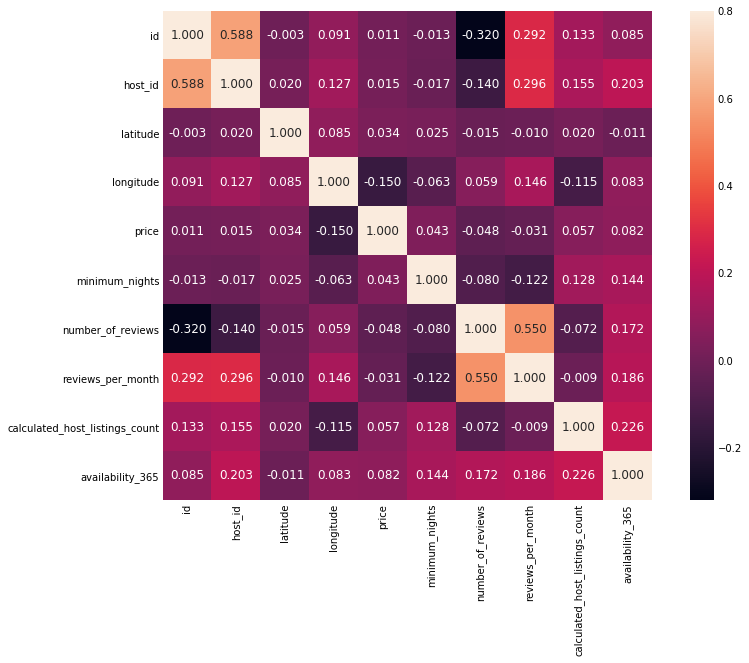

In [19]:
#correlation matrix

corrmat = df.corr() #matriz de correlación
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,cbar=True, annot=True, fmt='.3f', annot_kws={'size': 12})

In [20]:
df.corr().style.background_gradient(cmap='coolwarm')

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.291828,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.296417,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,0.291828,0.296417,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


## Relación ente los missing values y los precios

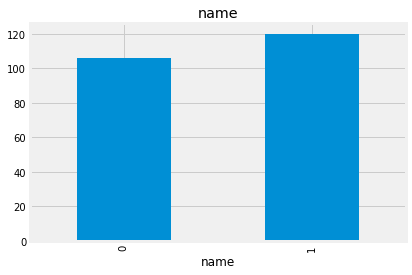

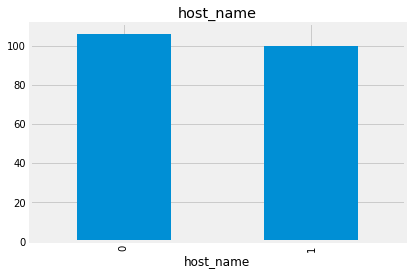

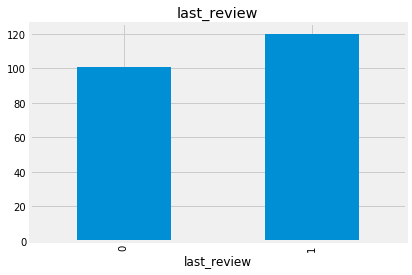

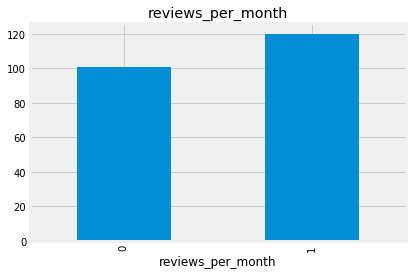

In [21]:
def analyse_na_value(df,var):
    df=df.copy()
    
    #Let's make a variable that indicates 1 if the observation was missing or Zero otherwise 
    df[var]=np.where(df[var].isnull(),1,0)
    
    #Let's calculate the mean SalePrice where the information is missing or present 
    df.groupby(var)['price'].median().plot.bar()
    plt.title(var)
    plt.show()
    
for var in vars_with_na:
    analyse_na_value(df,var)

## Exploratory Data Analysis *(EDA)*

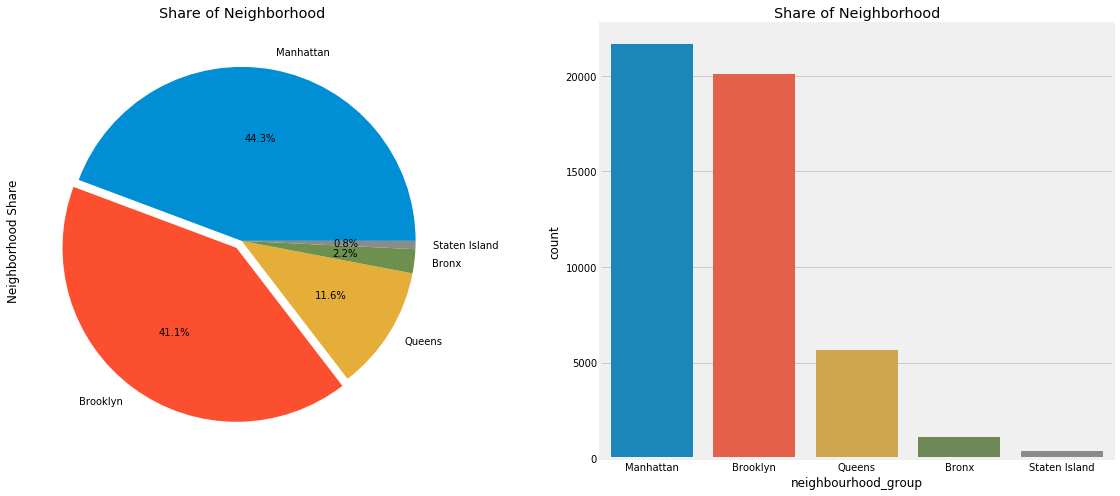

In [24]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['neighbourhood_group'].value_counts().plot.pie(explode=[0,0.05,0,0,0],autopct='%1.1f%%',ax=ax[0],shadow=False)
ax[0].set_title('Share of Neighborhood')
ax[0].set_ylabel('Neighborhood Share')
sns.countplot('neighbourhood_group',data=df,ax=ax[1],order=df['neighbourhood_group'].value_counts().index)
ax[1].set_title('Share of Neighborhood')
plt.show()

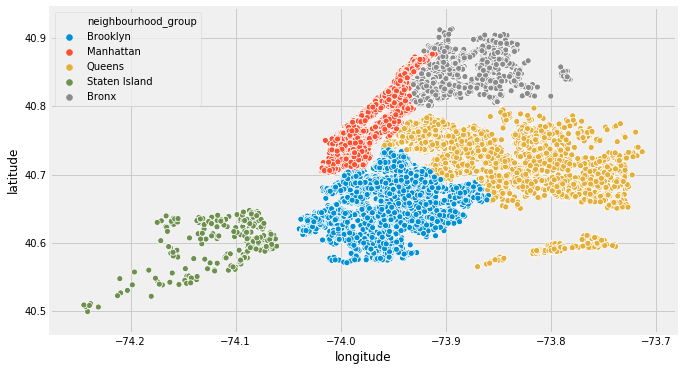

In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group)
plt.ioff()

## Distribución de los hoteles en NYC

In [26]:
import folium
from folium.plugins import HeatMap

m=folium.Map([40.7128,-74.0060],zoom_start=11)
HeatMap(df[['latitude','longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(m)
display(m)

## Cómo el precio varía con el distrito

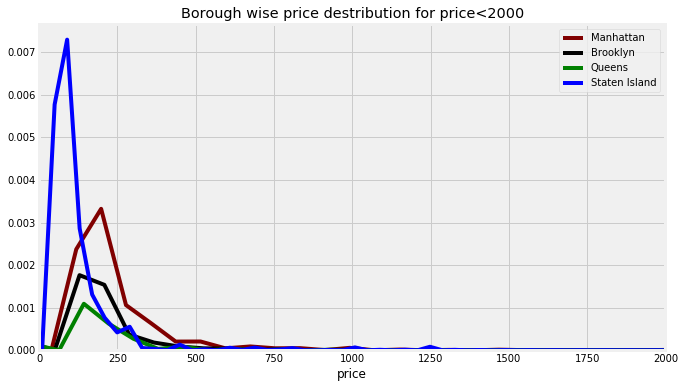

In [28]:
plt.figure(figsize=(10,6))
sns.distplot(df[df.neighbourhood_group=='Manhattan'].price,color='maroon',hist=False,label='Manhattan')
sns.distplot(df[df.neighbourhood_group=='Brooklyn'].price,color='black',hist=False,label='Brooklyn')
sns.distplot(df[df.neighbourhood_group=='Queens'].price,color='green',hist=False,label='Queens')
sns.distplot(df[df.neighbourhood_group=='Staten Island'].price,color='blue',hist=False,label='Staten Island')
sns.distplot(df[df.neighbourhood_group=='Long Island'].price,color='lavender',hist=False,label='Long Island')
plt.title('Borough wise price destribution for price<2000')
plt.xlim(0,2000)
plt.show()

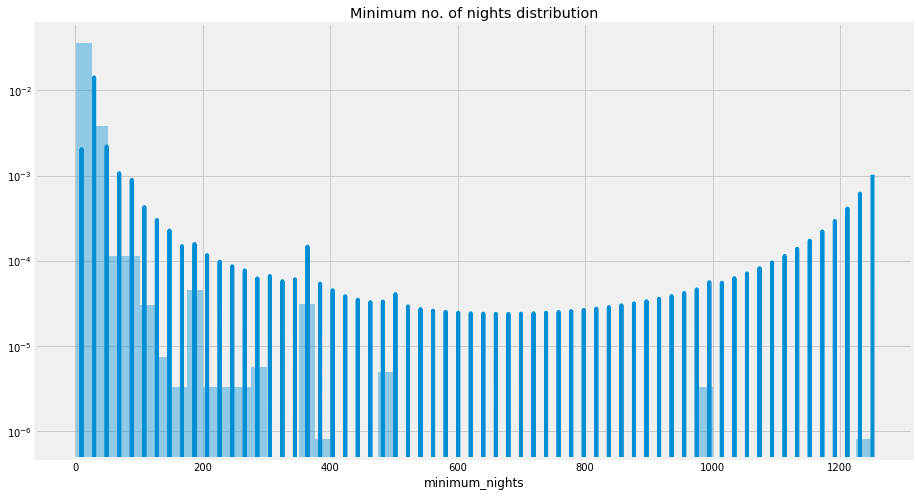

In [29]:
plt.figure(figsize=(14,8))
sns.distplot(df.minimum_nights).set_yscale('log')
plt.title('Minimum no. of nights distribution')
plt.show()

[]

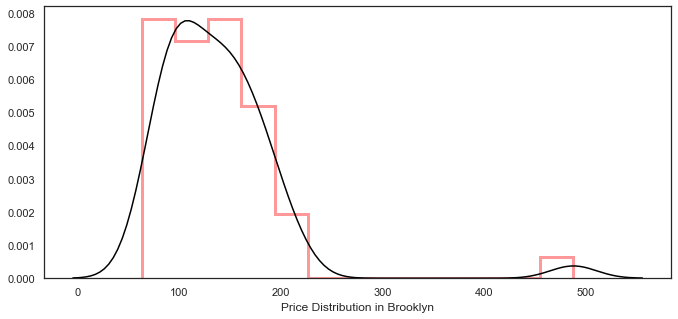

In [32]:
## setting style for our plots
sns.set(style="white", palette="spring", color_codes=True)

plt.figure(figsize=(10, 5))

## create dataframe "df1" with all the neighbourhood of Brooklyn and their price
df1 = df[df.neighbourhood_group == "Brooklyn"][["neighbourhood","price"]]

## lets take mean of all the prices of neighbouhood
d = df1.groupby("neighbourhood").mean()

## distplot -> distribution plot
## axlabel == xlabel
## kde_kws -> kernel density estimate keyword arguments -> color="black"
## hist_kws -> histogram keyword arguments -> histogram type = step
sns.distplot(d,color='r',axlabel ="Price Distribution in Brooklyn",kde_kws={"color": "k"},
             hist_kws={"histtype":"step","linewidth": 3});
plt.ioff()
plt.plot()

<Figure size 720x432 with 0 Axes>

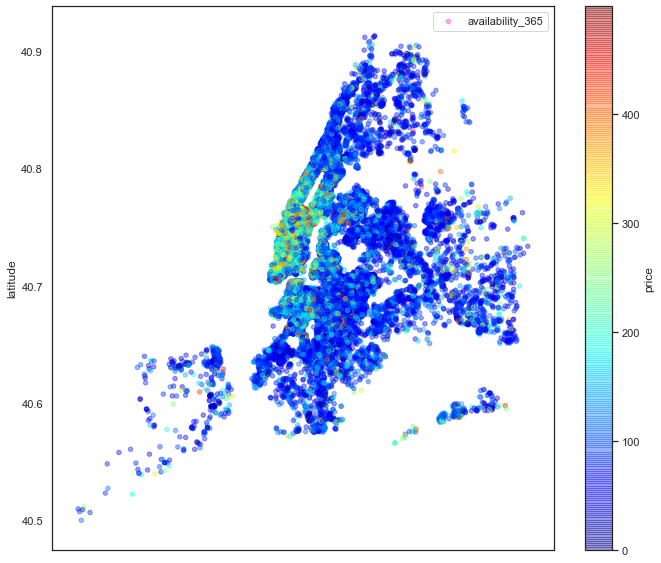

In [33]:
plt.figure(figsize=(10,6));
sub_6=df[df.price<500];
viz_4=sub_6.plot(kind='scatter', x='longitude',y='latitude',label='availability_365',c='price',cmap=plt.get_cmap('jet'),colorbar=True,alpha=0.4,figsize=(10,10));
viz_4.legend();
plt.ioff()

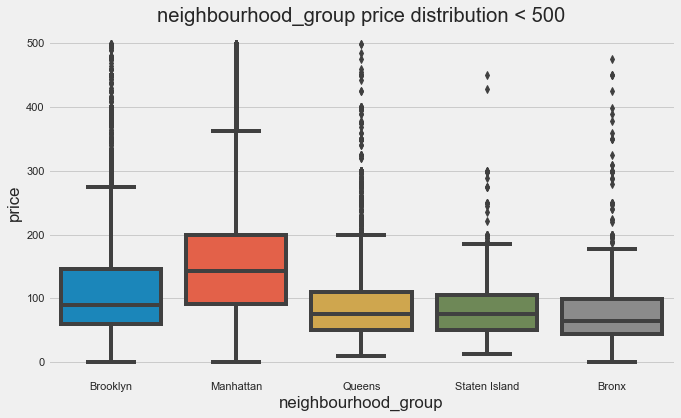

In [34]:
plt.style.use('fivethirtyeight')
ng = df[df.price <500]
plt.figure(figsize=(10,6))
sns.boxplot(y="price",x ='neighbourhood_group' ,data = ng)
plt.title("neighbourhood_group price distribution < 500")
plt.show()

## Categorización de los precios

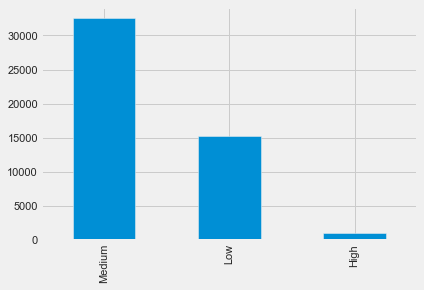

In [35]:
def rank_price(hotel_price):
    if hotel_price<=75:
        return 'Low'
    elif hotel_price >75 and hotel_price<=500:
        return 'Medium'
    else:
        return 'High'

df['price'].apply(rank_price).value_counts().plot(kind='bar')

In [37]:
print ("Total Neighbourhoods: ", len(np.unique(df.neighbourhood)))

Total Neighbourhoods:  221


In [39]:
#agrupamos barrios por el precio medio
df_top_prices_by_neighbourhood = df.groupby('neighbourhood').agg({'price': 'mean'}).sort_values('price').reset_index()
df_top_prices_by_neighbourhood.columns

Index(['neighbourhood', 'price'], dtype='object')

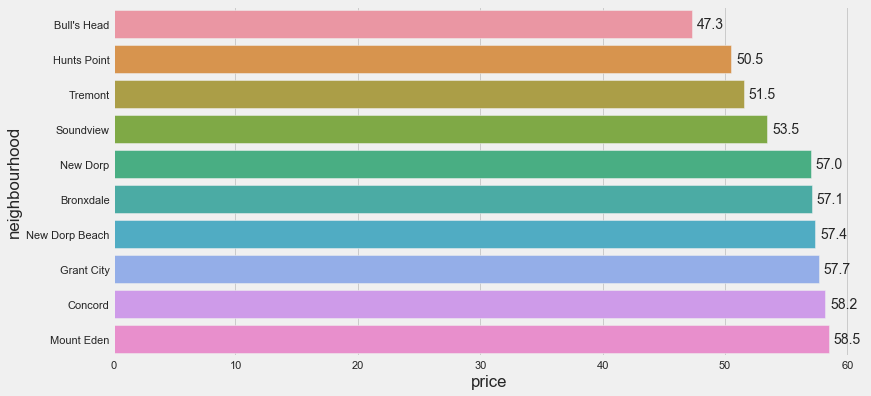

In [42]:
plt.figure(figsize=(12,6))
ax=sns.barplot(y="neighbourhood", x="price", data=df_top_prices_by_neighbourhood.head(10))
plt.ioff()

#-----------------------Poner etiquetas encima de las barras---------------------------
rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = "{:.1f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha)                      # Horizontally align label differently for
                                    # positive and negative values.